umbralizacion con la tecnica de ISOdata

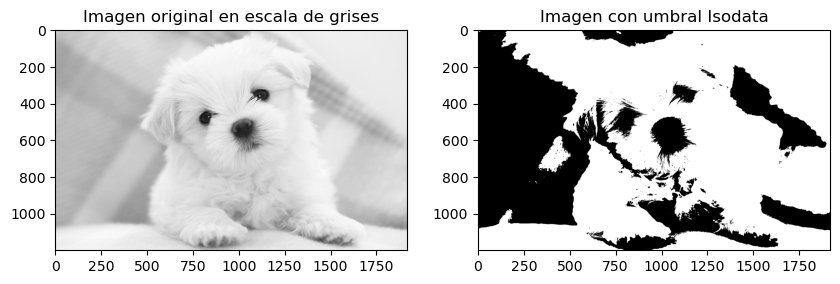

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata(imagen):
    umbral = 100
    while True:
        grupo1 = imagen[imagen <= umbral]
        grupo2 = imagen[imagen > umbral]
        mediag1 = np.mean(grupo1)
        mediag2 = np.mean(grupo2)
        
        umbral_nuevo = (mediag1 + mediag2) / 2
        
        if abs(umbral_nuevo-umbral)<0.5:
            break
        umbral = umbral_nuevo
        
    return umbral

imagen= cv2.imread('perrito.jpg',0)

umbral_isodata= isodata(imagen)

_, imagen_isodata = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Isodata')
plt.imshow(imagen_isodata, cmap='gray')

plt.show()

Tecnica de dos picos

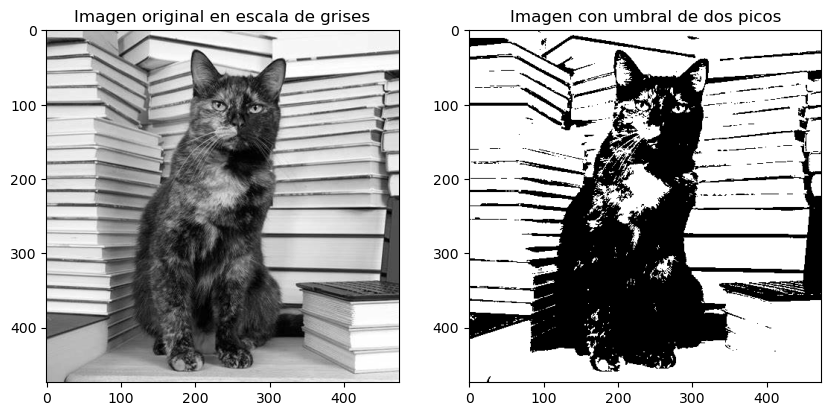

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dos_picos(imagen):
    hist = cv2.calcHist([imagen], [0], None, [256], [0, 150])
    pico = hist.flatten()
    pico_dif = np.diff(pico)
    primer_pico = np.argmax(pico_dif[:128])
    segundo_pico = np.argmax(pico_dif[128:]) + 128
    umbral_2picos = int((primer_pico + segundo_pico) / 2)
    return umbral_2picos

imagen = cv2.imread('gato.jpg', 0)
umbral_2pic = dos_picos(imagen)

_, imagen_2picos = cv2.threshold(imagen, umbral_2pic, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral de dos picos')
plt.imshow(imagen_2picos, cmap='gray')

plt.show()


Metodo de otsu


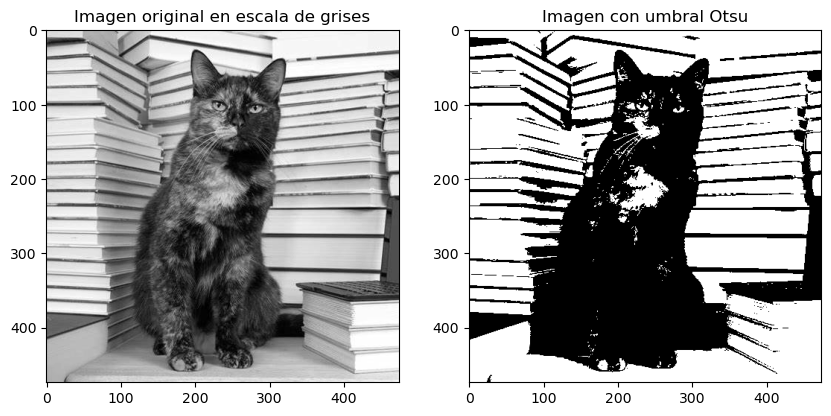

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', 0)
_, imagen_otsu = cv2.threshold(imagen, 0, 180, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_image = np.where(imagen > imagen_otsu, 255, 0).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Otsu')
plt.imshow(imagen_otsu, cmap='gray')

plt.show()


Umbralizacion variable- particion de una imagen



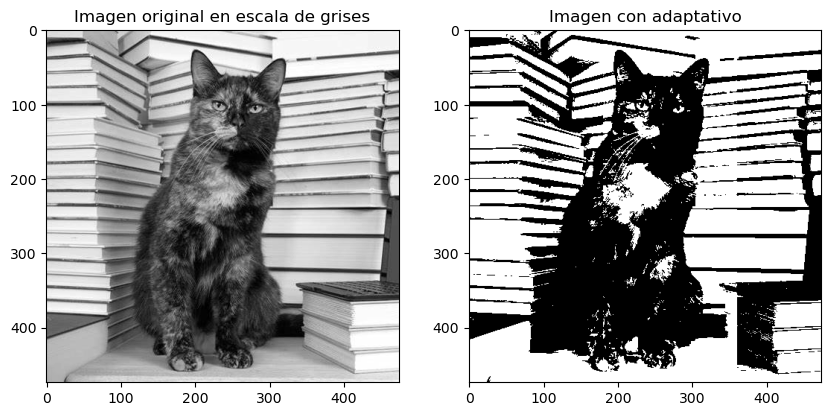

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def variable_umb_block(image, tam_bloq, c):
    umbral_img = np.zeros_like(image)
    for y in range(0, image.shape[0], tam_bloq):
        for x in range(0, image.shape[1], tam_bloq):
            bloque = image[y:y+tam_bloq, x:x+tam_bloq]
            bloque_media = np.mean(bloque)
            umbral_adap = bloque_media - c
            umbral_img[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap) * 255
    return umbral_img

imagen = cv2.imread('gato.jpg', 0)
tam_bloq = 180
c = 10
umbral_ima_adap = variable_umb_block(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con adaptativo')
plt.imshow(umbral_ima_adap, cmap='gray')

plt.show()


Con desviacion

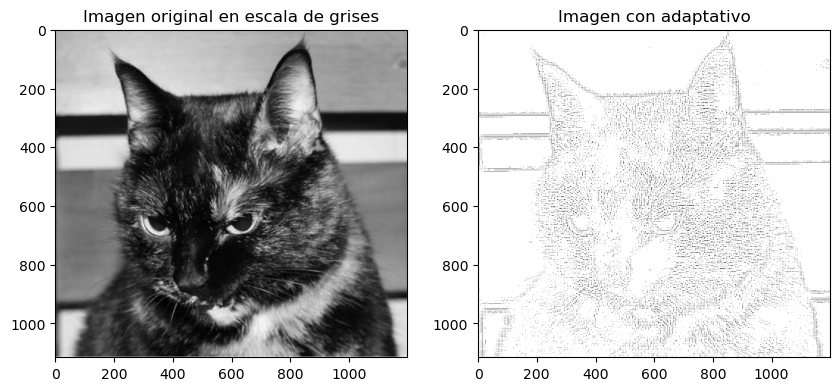

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def umbra_var2(image,tam_bloq,ajuste):
    umbral_img = np.zeros_like(image)
    for y in range(0, image.shape[0], tam_bloq):
        for x in range(0, image.shape[1], tam_bloq):
            bloque = image[y:y+tam_bloq, x:x+tam_bloq]
            bloque_media = np.mean(bloque)
            des=np.std(bloque)
            umbral_adap = bloque_media - (ajuste+des)
            umbral_img[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap) * 255
    return umbral_img


imagen = cv2.imread('gato2.jpg', 0)
tam_bloq = 5
c = 3
umbral_ima_adap = umbra_var2(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con adaptativo')
plt.imshow(umbral_ima_adap, cmap='gray')

plt.show()

Adaptativa con ventana

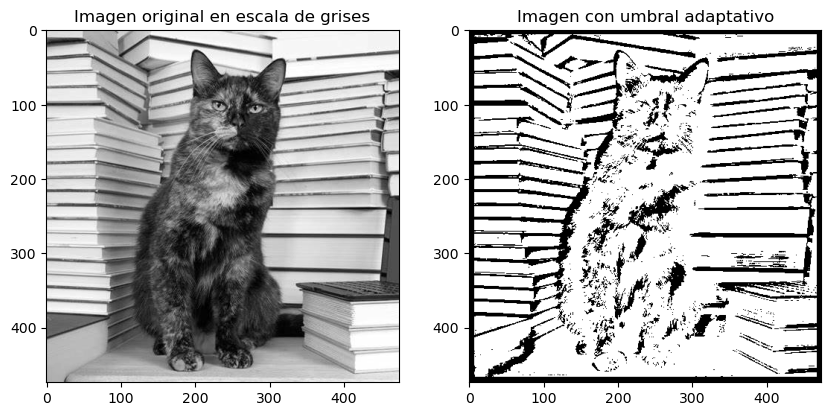

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ventana(imagen, ventana, factor):
    umbre_image = np.zeros_like(imagen)
    pad = ventana // 2
    padd_image = cv2.copyMakeBorder(imagen, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    for y in range(pad, imagen.shape[0] - pad):
        for x in range(pad, imagen.shape[1] - pad):
            ventana1 = padd_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            media = np.mean(ventana1)
            dis = np.std(ventana1)
            umbral = media - (factor + dis)
            umbre_image[y, x] = 255 if imagen[y, x] > umbral else 0
    return umbre_image

imagen = cv2.imread('gato.jpg', 0)
tam_bloq = 15
c = 2
umbral = ventana(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral adaptativo')
plt.imshow(umbral, cmap='gray')

plt.show()


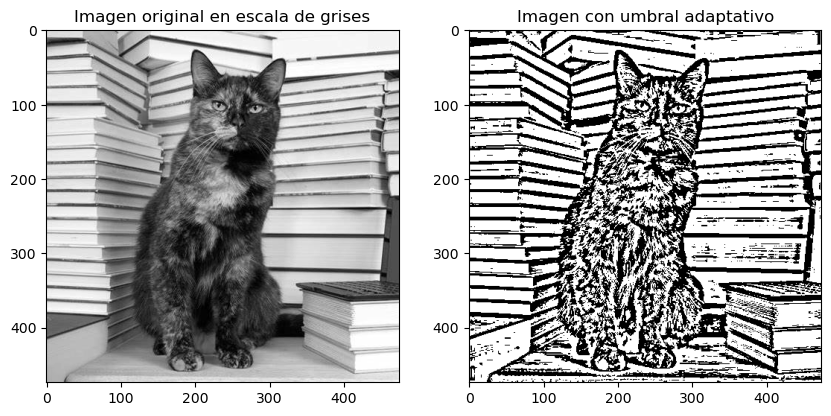

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('gato.jpg', 0)
ventana = 15
factor = 2
imagen_umbr = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, ventana, factor)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral adaptativo')
plt.imshow(imagen_umbr, cmap='gray')

plt.show()


Actividad Investigacion del metodo OTSU



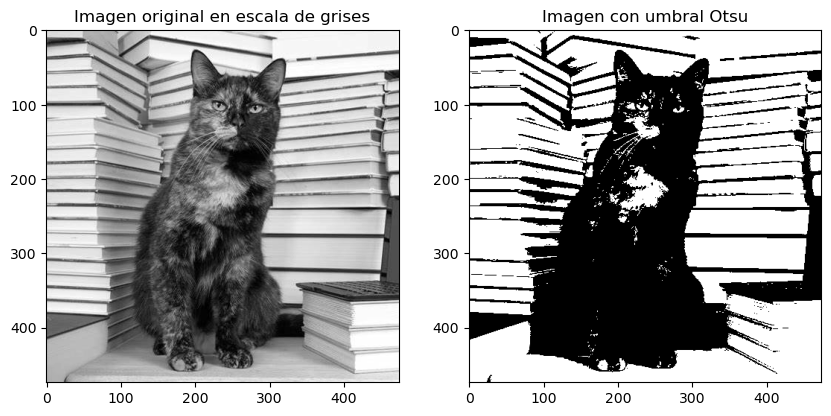

In [181]:
import numpy as np
import matplotlib.pyplot as plt

def otsu(imagen):
    bins_num = 255
    hist, bin_edges = np.histogram(imagen, bins=bins_num)
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    return threshold

imagen = cv2.imread('gato.jpg', 0)
umbral_otsu = otsu(imagen)

_, imagen_otsu = cv2.threshold(imagen, umbral_otsu, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Otsu')
plt.imshow(imagen_otsu, cmap='gray')

plt.show()


umbralizacion por defecto en tuzero en opencv

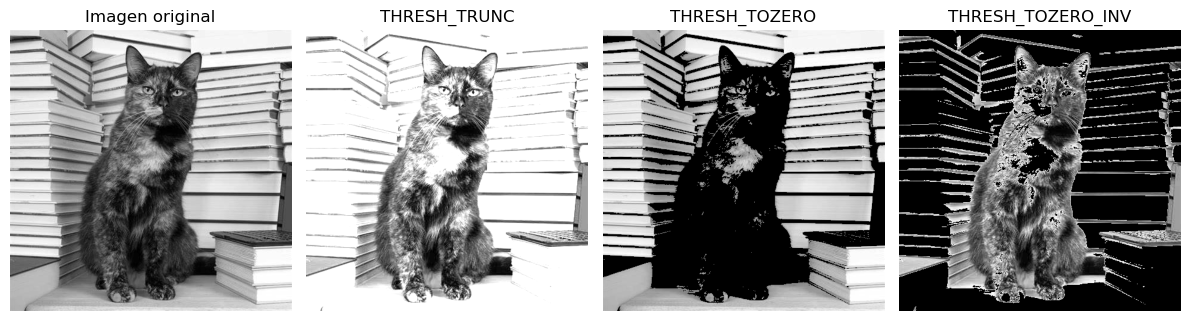

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread('gato.jpg', 0)

# Aplicar umbralización
_, umbr_trunc = cv2.threshold(imagen, 127, 200, cv2.THRESH_TRUNC)
_, umbr_tozero = cv2.threshold(imagen, 127, 200, cv2.THRESH_TOZERO)
_, umbr_tozeroinv = cv2.threshold(imagen, 127, 255, cv2.THRESH_TOZERO_INV)

# Mostrar imágenes
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(umbr_trunc, cmap='gray')
plt.title('THRESH_TRUNC')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(umbr_tozero, cmap='gray')
plt.title('THRESH_TOZERO')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(umbr_tozeroinv, cmap='gray')
plt.title('THRESH_TOZERO_INV')
plt.axis('off')

plt.tight_layout()
plt.show()


negativo de una imagen

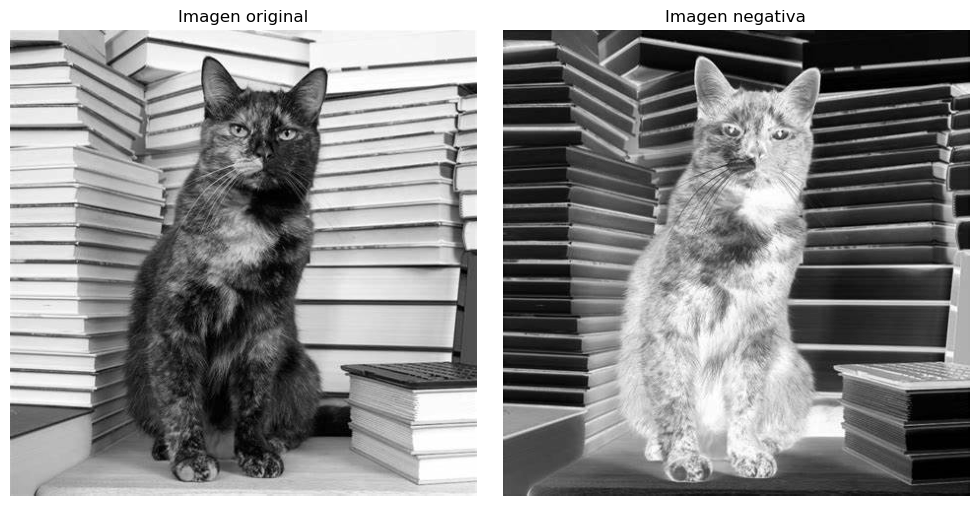

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)

# Crear imagen negativa
img_neg = 255 - imagen

# Mostrar imágenes
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_neg, cmap='gray')
plt.title('Imagen negativa')
plt.axis('off')

plt.tight_layout()
plt.show()


Contraste 

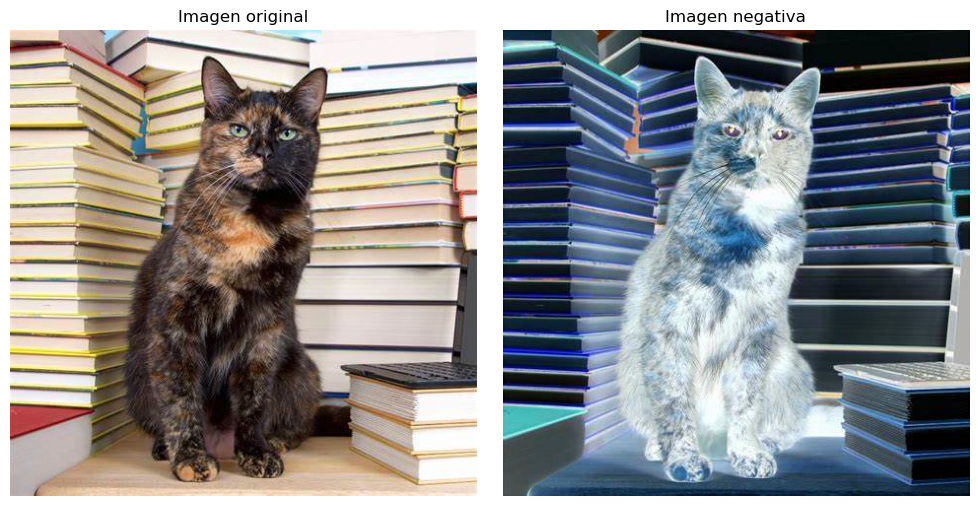

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
imagen = cv2.imread('gato.jpg')

# Crear imagen negativa
img_neg = 255 - imagen

# Mostrar imágenes
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB))
plt.title('Imagen negativa')
plt.axis('off')

plt.tight_layout()
plt.show()


Contraste

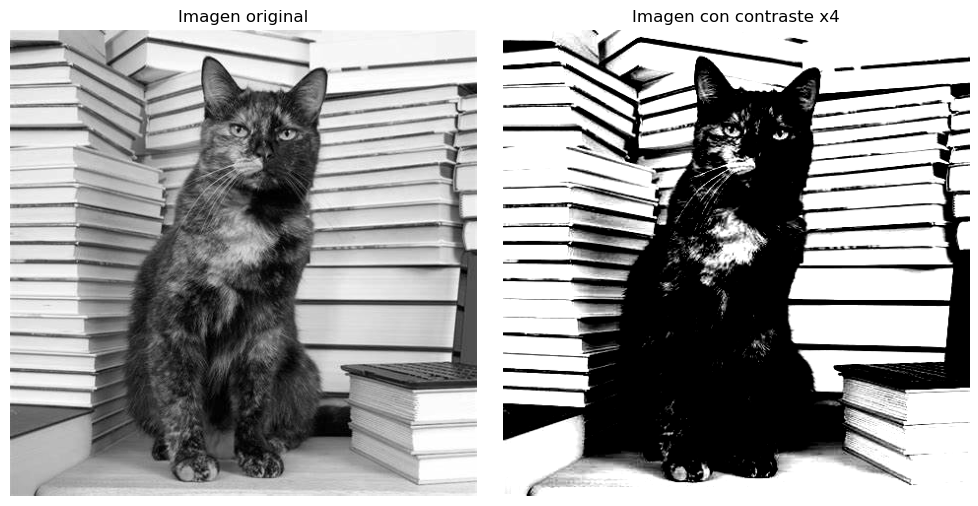

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def contraste(img, factor=1.0):
    img = img.astype(np.float32)
    media = np.mean(img)
    img_contraste = media + (img - media) * factor
    img_contraste = np.clip(img_contraste, 0, 255).astype(np.uint8)
    return img_contraste


img = cv2.imread('gato.jpg', 0)

factor_contraste = 4
img_nueva = contraste(img, factor_contraste)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_nueva, cmap='gray')
plt.title(f'Imagen con contraste x{factor_contraste}')
plt.axis('off')

plt.tight_layout()
plt.show()


CONTRASTE A COLORES 

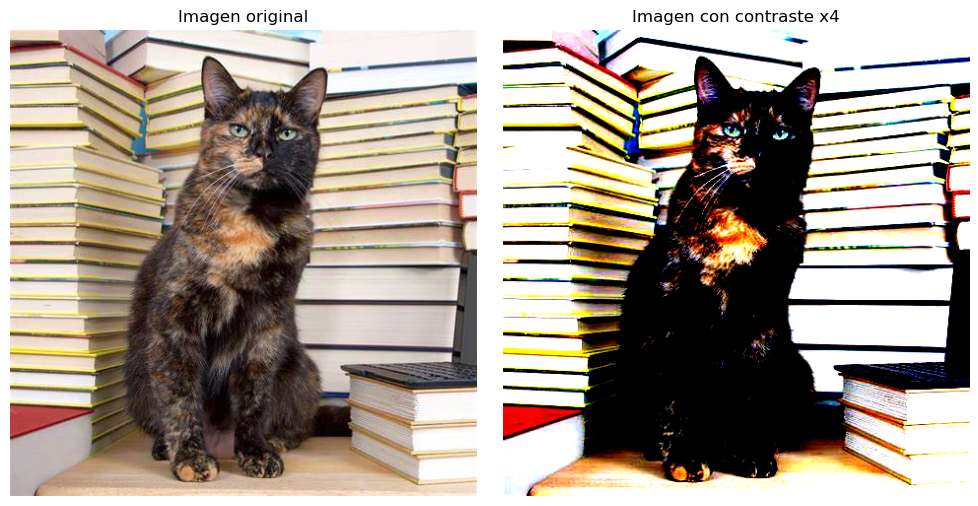

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def contraste_color(imagen, factor=1.0):
    img= imagen.astype(np.float32)
    for i in range(3):
        media = np.mean(img[:, :, i])
        img[:, :, i] = media + (img[:, :, i] - media) * factor
        img[:, :, i] = np.clip(img[:, :, i], 0, 255)
    return img.astype(np.uint8)


img = cv2.imread('gato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


factor_contraste = 4
img_nueva = contraste_color(img, factor_contraste)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_nueva)
plt.title(f'Imagen con contraste x{factor_contraste}')
plt.axis('off')

plt.tight_layout()
plt.show()


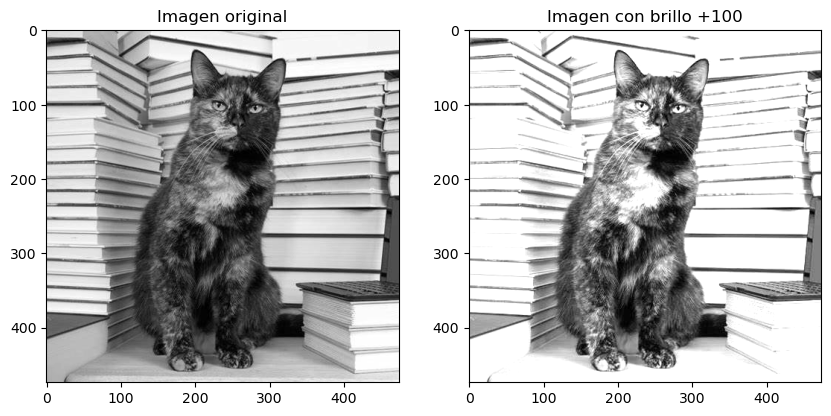

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def brillo(imagen, brillo=0):
    img_brillo = imagen.astype(np.float32) + brillo
    img_brillo = np.clip(img_brillo, 0, 255).astype(np.uint8)
    return img_brillo

img = cv2.imread('gato.jpg', 0)
brillo_v = 100
img_brillo = brillo(img, brillo_v)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')

plt.subplot(122)
plt.imshow(img_brillo, cmap='gray')
plt.title(f'Imagen con brillo +{brillo_v}')

plt.show()


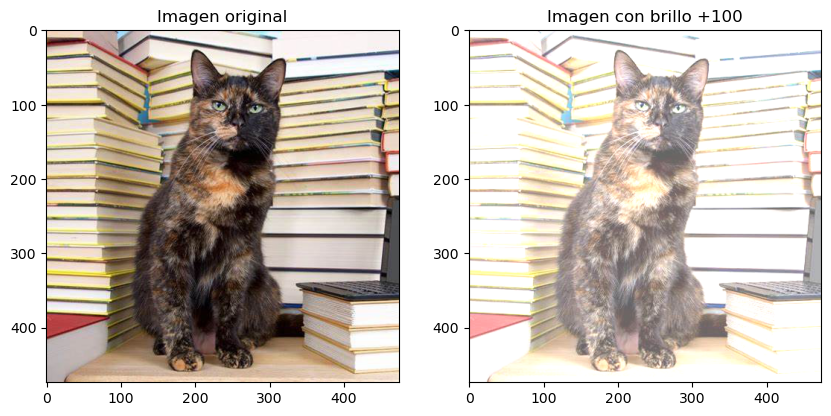

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def brillo(imagen, brillo=0):
    img_brillo = imagen.astype(np.float32) + brillo
    img_brillo = np.clip(img_brillo, 0, 255).astype(np.uint8)
    return img_brillo

img = cv2.imread('gato.jpg')
brillo_v = 100
img_nueva = brillo(img, brillo_v)
img_color = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_result = cv2.cvtColor(img_nueva,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img_color, cmap='gray')
plt.title('Imagen original')

plt.subplot(122)
plt.imshow(img_result, cmap='gray')
plt.title(f'Imagen con brillo +{brillo_v}')

plt.show()


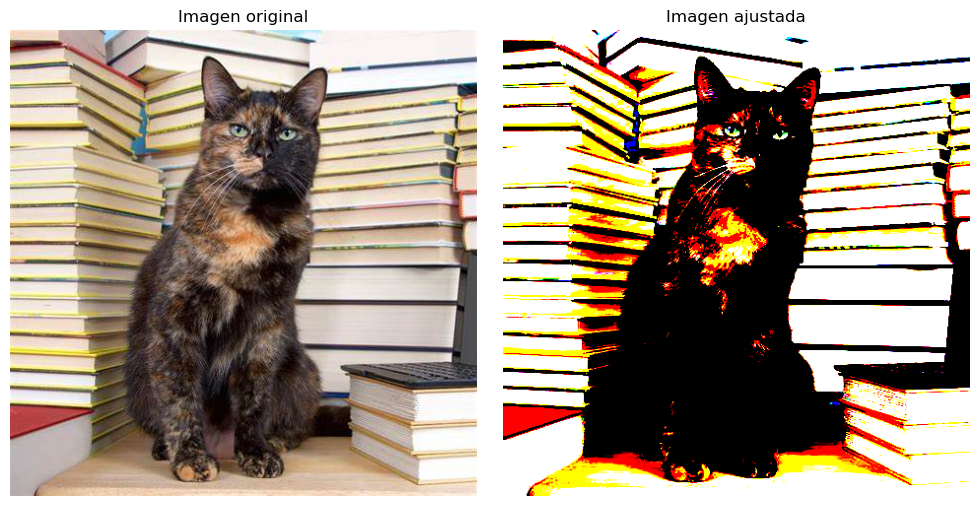

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ajuste(imagen, contraste=1, brillo=0):
    imagen = imagen.astype(np.float32)
    media = np.mean(imagen)
    imagen_ajustada = media + (imagen - media) * contraste + brillo
    imagen_ajustada = np.clip(imagen_ajustada, 0, 255).astype(np.uint8)
    return imagen_ajustada

img = cv2.imread('gato.jpg')
contraste_valor = 28
brillo_valor = 28

img_nueva = ajuste(img, contraste_valor, brillo_valor)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_nueva_rgb = cv2.cvtColor(img_nueva, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_nueva_rgb)
plt.title(f'Imagen ajustada')
plt.axis('off')

plt.tight_layout()
plt.show()


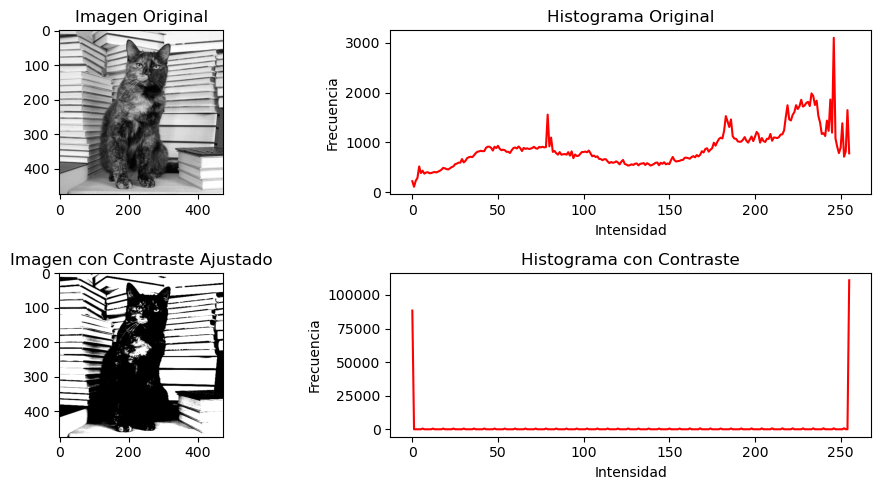

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contraste(imagen, factor=1.0):
    imagen = imagen.astype(np.float32)
    media = np.mean(imagen)
    contrastada = media + (imagen - media) * factor 
    contrastada = np.clip(contrastada, 0, 255).astype(np.uint8)
    return contrastada

img = cv2.imread('gato.jpg', 0)
f_contraste = 6
img_nueva = contraste(img, f_contraste)

histograma_ori = cv2.calcHist([img], [0], None, [256], [0, 256])
histograma_contraste = cv2.calcHist([img_nueva], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(222)
plt.plot(histograma_ori.flatten(), color='red')
plt.title('Histograma Original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(223)
plt.imshow(img_nueva, cmap='gray')
plt.title('Imagen con Contraste Ajustado')

plt.subplot(224)
plt.plot(histograma_contraste.flatten(), color='red')
plt.title('Histograma con Contraste')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



lectura,punto de interes e histograma en 3canales

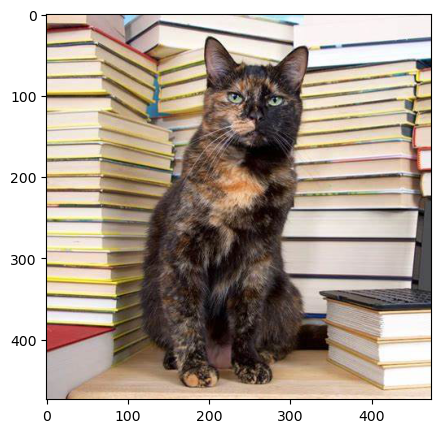

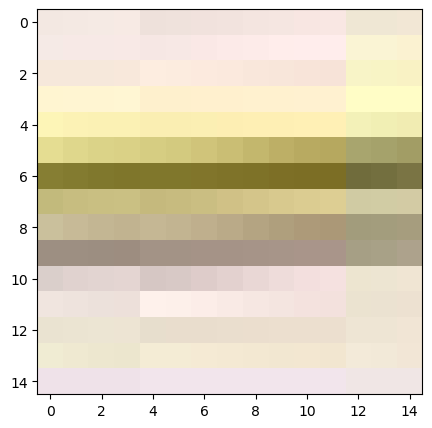

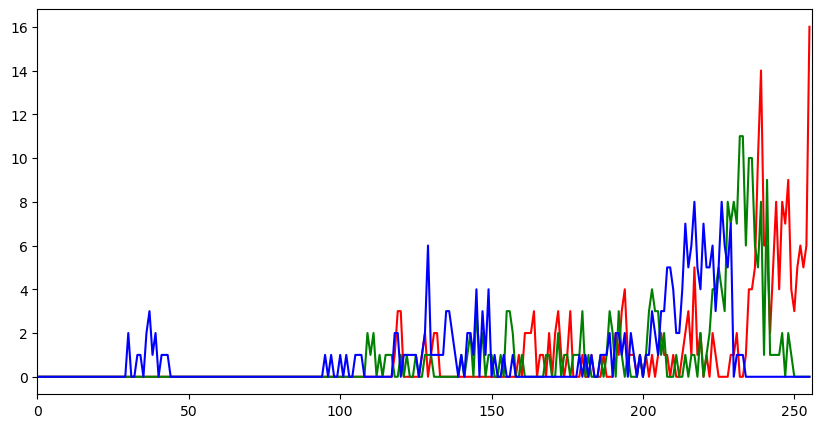

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
imagen = cv2.imread('gato.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.show()

plt.imshow(imagen_rgb[50:65, 20:35, :])
plt.show()

img_cortada = imagen_rgb[50:65, 20:35, :]
plt.imsave('img_cortada.jpg', img_cortada)

seccionada = plt.imread('img_cortada.jpg')
color = ('r', 'g', 'b')
for canal, col in enumerate(color):
    histograma = cv2.calcHist([seccionada], [canal], None, [256], [0, 256])
    plt.plot(histograma, color=col)
    plt.xlim([0, 256])
plt.show()


Mascaras

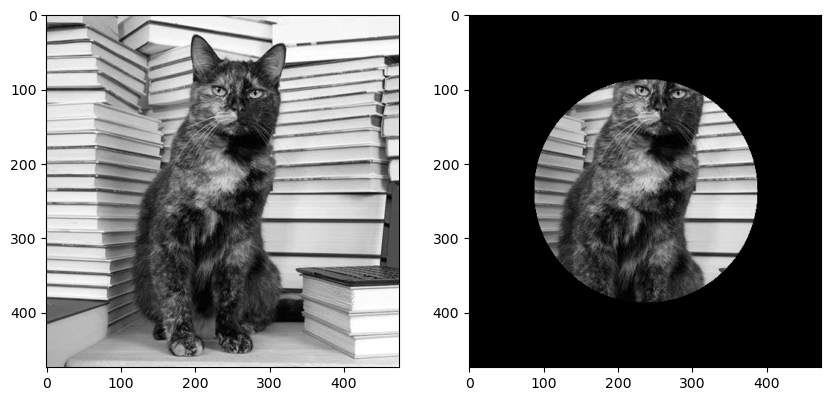

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('gato.jpg',0)

alto,ancho = img.shape[:2]

mascara = np.zeros_like(img)
centro = (ancho//2,alto//2)
radio = 150

cv2.circle(mascara,centro,radio,(255),-1)
img_mascara = cv2.bitwise_and(img,img,mask=mascara)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(img_mascara,cmap='gray')

Ejercicios

Ejercicio 1 Degradado

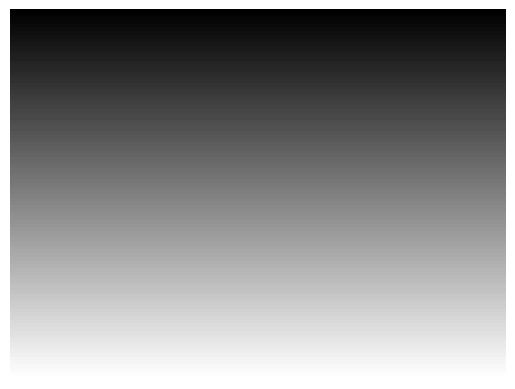

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Definición de colores
colores = [(0, 'black'), (1, 'white')]  # Para generar la escala de grises
cmap = LinearSegmentedColormap.from_list('degradado', colores)  # Generar colormap a travez del array

# Generar la imagen del degradado
imagen_degra = np.linspace(0, 1, 100).reshape(-1, 1)
imagen_degra = cmap(imagen_degra)

plt.imshow(imagen_degra, aspect='auto')
plt.axis('off')
plt.show()


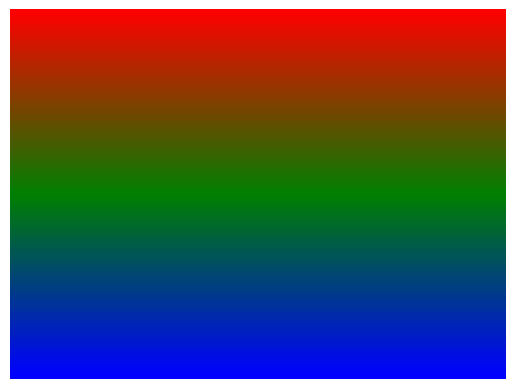

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colores = [(0, 'red'), (0.5, 'green'), (1, 'blue')]
cmap = LinearSegmentedColormap.from_list('degradado', colores)

imagen_degra = np.linspace(0, 1, 100).reshape(-1, 1)
imagen_degra = cmap(imagen_degra)

plt.imshow(imagen_degra, aspect='auto')
plt.axis('off')
plt.show()


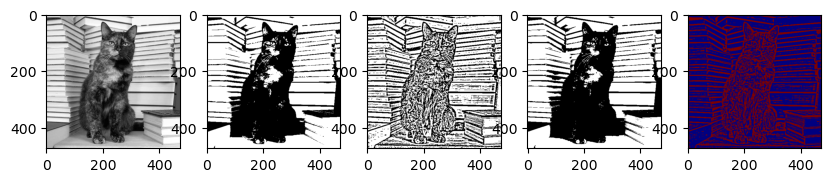

In [4]:
import matplotlib.pyplot as plt
import cv2

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)
_, umbra_bi = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
umb_adap = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, otsu = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
color = cv2.applyColorMap(umb_adap, cv2.COLORMAP_JET)

plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 5, 2)
plt.imshow(umbra_bi, cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(umb_adap, cmap='gray')
plt.subplot(1, 5, 4)
plt.imshow(otsu, cmap='gray')
plt.subplot(1, 5, 5)
plt.imshow(color, cmap='gray')

plt.show()


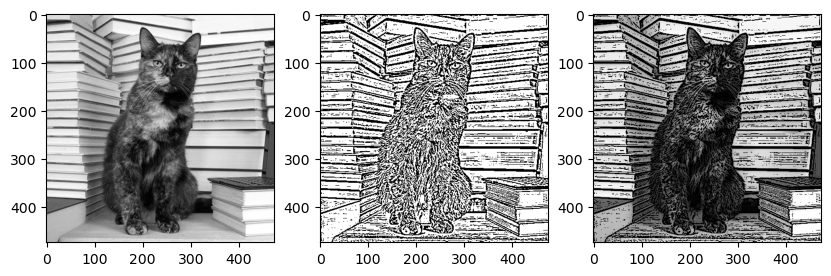

In [9]:
import matplotlib.pyplot as plt
import cv2

imagen = cv2.imread('gato.jpg', 0)

umb_adap = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
mask = umb_adap == 255
imag_junta = cv2.bitwise_and(imagen, imagen, mask=umb_adap)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(umb_adap, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(imag_junta, cmap='gray')
plt.show()

solarizacion y negativo

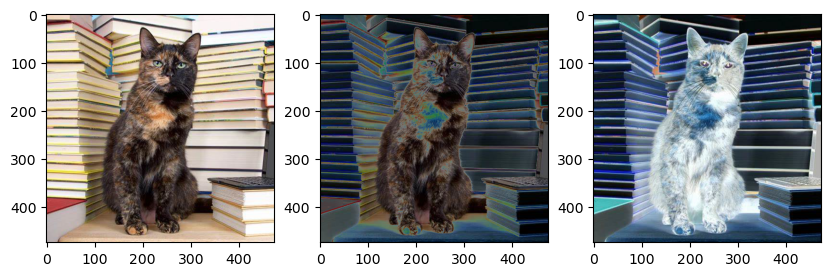

In [12]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg')

def solarizar(imagen, umbral):
    return np.where(imagen < umbral, imagen, 255 - imagen)

img_solarizada = solarizar(imagen, 128)  # Cambié el umbral de 0 a 128 para que tenga efecto
imagen_negativo = 255 - imagen

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_solarizada, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imagen_negativo, cv2.COLOR_BGR2RGB))
plt.show()
